#### Group 6
##### Name: Nafiz Imtiaz Rafin                         ID: 19101169
##### Name: Rubaiyet Hossain Jawwad          ID: 19101079

# Importing necessary Libraries 

In [149]:
import  numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Reading Datasets

In [150]:
loan_train = pd.read_csv('LoanPricePred_train.csv')
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [151]:
loan_test = pd.read_csv('LoanPricePred_test.csv')
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Data Pre Processing and EDA

In [152]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [153]:
loan_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [154]:
print (loan_train.shape, loan_test.shape)

(614, 13) (367, 12)


In [155]:
#Counting frequency of categories for each categorical features
data = [loan_train,loan_test]
for dataset in data:
    #Filter categorical variables
    categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
    # Exclude ID cols and source:
    categorical_columns = [x for x in categorical_columns if x not in ['Loan_ID' ]]
    #Print frequency of categories
    
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (loan_train[col].value_counts())


Frequency of Categories for variable Gender
Male      489
Female    112
Name: Gender, dtype: int64

Frequency of Categories for variable Married
Yes    398
No     213
Name: Married, dtype: int64

Frequency of Categories for variable Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Frequency of Categories for variable Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Frequency of Categories for variable Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

Frequency of Categories for variable Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


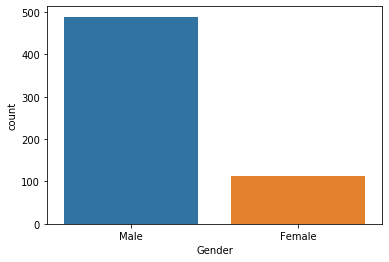

In [156]:
#Plotting No. of Males vs No. of Females
sns.countplot(loan_train['Gender'])

In [157]:
#Filling up NAN values of Gender and Converting categorial variables(Male,Female) to numerical variables(0,1)
loan_train['Gender'] = loan_train['Gender'].fillna(loan_train['Gender'].mode()[0])
loan_test['Gender'] = loan_test['Gender'].fillna(loan_test['Gender'].mode()[0])

label_encoder = LabelEncoder()
loan_train['Gender']= label_encoder.fit_transform(loan_train['Gender'])

loan_test['Gender']= label_encoder.fit_transform(loan_test['Gender'])

In [158]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [159]:
loan_train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

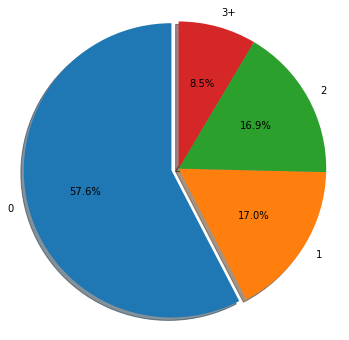

In [160]:
#Plotting No. of Dependants (Size of family) in each household
plt.figure(figsize=(6,6))
labels = ['0' , '1', '2' , '3+']
explode = (0.05, 0, 0, 0)
size = [345 , 102 , 101 , 51]

plt.pie(size, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [161]:
#Filling up NAN values of Dependents and Converting categorial variables(1,2,3+) to numerical variables(1,2,3)
loan_train.Dependents = loan_train.Dependents.fillna("0")
loan_test.Dependents = loan_test.Dependents.fillna("0")

rpl = {'0':'0', '1':'1', '2':'2', '3+':'3'}

loan_train.Dependents = loan_train.Dependents.replace(rpl).astype(int)
loan_test.Dependents = loan_test.Dependents.replace(rpl).astype(int)

In [162]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


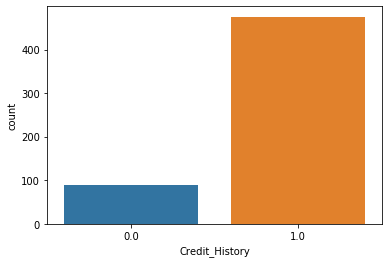

In [163]:
#Plotting No. of people with vs without Credit History
sns.countplot(loan_train['Credit_History'])

In [164]:
#fill up NaN values for "Credit_History"
loan_train.Credit_History = loan_train.Credit_History.fillna(loan_train.Credit_History.mode()[0])
loan_test.Credit_History  = loan_test.Credit_History.fillna(loan_test.Credit_History.mode()[0])

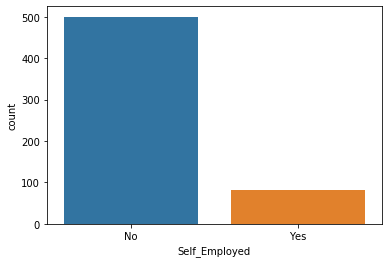

In [165]:
#Plotting No. of people who are Self-employed vs who aren't
sns.countplot(loan_train['Self_Employed'])

In [166]:
#Filling NAN values and Converting categorial variables(Yes,No) to numerical variables(1,0)
loan_train['Self_Employed'] = loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0])
loan_test['Self_Employed'] = loan_test['Self_Employed'].fillna(loan_test['Self_Employed'].mode()[0])

label_encoder = LabelEncoder()
loan_train['Self_Employed']= label_encoder.fit_transform(loan_train['Self_Employed'])

loan_test['Self_Employed']= label_encoder.fit_transform(loan_test['Self_Employed'])

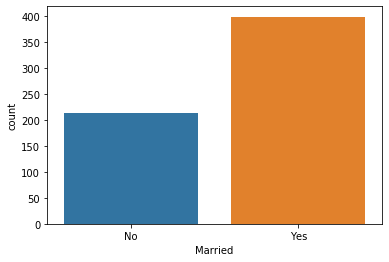

In [167]:
#Married VS Un Married
sns.countplot(loan_train.Married)

In [168]:
#Filling NAN values and Converting categorial variables(Yes,No) to numerical variables(1,0)
loan_train['Married'] = loan_train['Married'].fillna(loan_train['Married'].mode()[0])
loan_test['Married'] = loan_test['Married'].fillna(loan_test['Married'].mode()[0])

label_encoder = LabelEncoder()
loan_train['Married']= label_encoder.fit_transform(loan_train['Married'])

loan_test['Married']= label_encoder.fit_transform(loan_test['Married'])

In [169]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,1,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,Graduate,0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [170]:
#Filling up NAN values of Loan Amount Term
loan_train.drop(['Loan_Amount_Term'], axis = 1 , inplace =True)
loan_test.drop(['Loan_Amount_Term'], axis = 1 , inplace =True)

loan_train.LoanAmount = loan_train.LoanAmount.fillna(loan_train.LoanAmount.mean()).astype(int)
loan_test.LoanAmount = loan_test.LoanAmount.fillna(loan_test.LoanAmount.mean()).astype(int)

In [171]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,0,5849,0.0,146,1.0,Urban,Y
1,LP001003,1,1,1,Graduate,0,4583,1508.0,128,1.0,Rural,N
2,LP001005,1,1,0,Graduate,1,3000,0.0,66,1.0,Urban,Y
3,LP001006,1,1,0,Not Graduate,0,2583,2358.0,120,1.0,Urban,Y
4,LP001008,1,0,0,Graduate,0,6000,0.0,141,1.0,Urban,Y


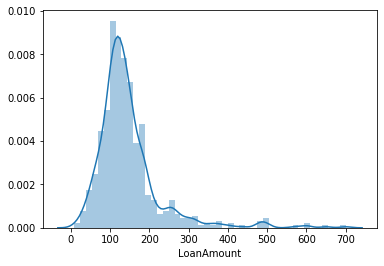

In [172]:
sns.distplot(loan_train['LoanAmount']) # NO outliers 

In [173]:
#Converting categorial variables to numerical variables
loan_train['Education'] = loan_train['Education'].map( {'Graduate': 0, 'Not Graduate': 1} ).astype(int)
loan_test['Education'] = loan_test['Education'].map( {'Graduate': 0, 'Not Graduate': 1} ).astype(int)

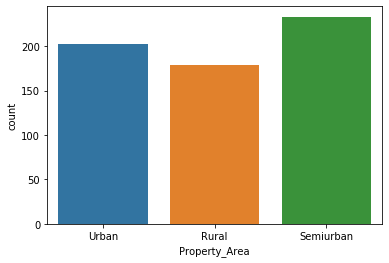

In [174]:
#Property Area
sns.countplot(loan_train.Property_Area)

In [175]:
#Converting categorial variables to numerical variables
label_encoder = LabelEncoder()
loan_train['Property_Area']= label_encoder.fit_transform(loan_train['Property_Area'])

loan_test['Property_Area']= label_encoder.fit_transform(loan_test['Property_Area'])

In [176]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146,1.0,2,Y
1,LP001003,1,1,1,0,0,4583,1508.0,128,1.0,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66,1.0,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120,1.0,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141,1.0,2,Y


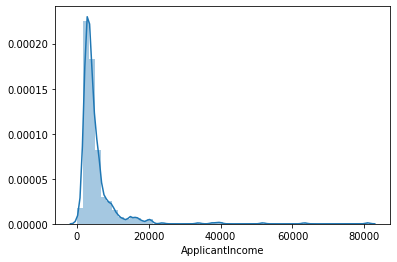

In [177]:
sns.distplot(loan_train['ApplicantIncome'])

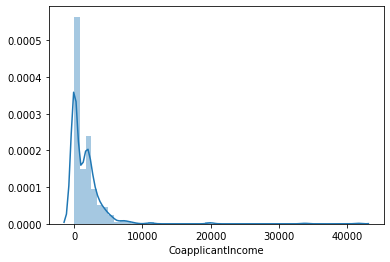

In [178]:
sns.distplot(loan_train['CoapplicantIncome'])

In [179]:
loan_train['Loan_Status'] = loan_train['Loan_Status'].map( {'N': 0, 'Y': 1 } ).astype(int)

In [180]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141,1.0,2,1


In [181]:
loan_train.drop(['Loan_ID'], axis = 1 , inplace =True)
loan_test.drop(['Loan_ID'], axis = 1 , inplace =True)

In [182]:
loan_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128,1.0,0,0
2,1,1,0,0,1,3000,0.0,66,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120,1.0,2,1
4,1,0,0,0,0,6000,0.0,141,1.0,2,1


In [183]:
loan_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110,1.0,2
1,1,1,1,0,0,3076,1500,126,1.0,2
2,1,1,2,0,0,5000,1800,208,1.0,2
3,1,1,2,0,0,2340,2546,100,1.0,2
4,1,0,0,1,0,3276,0,78,1.0,2


# Visualizing the Correlations and Relations

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


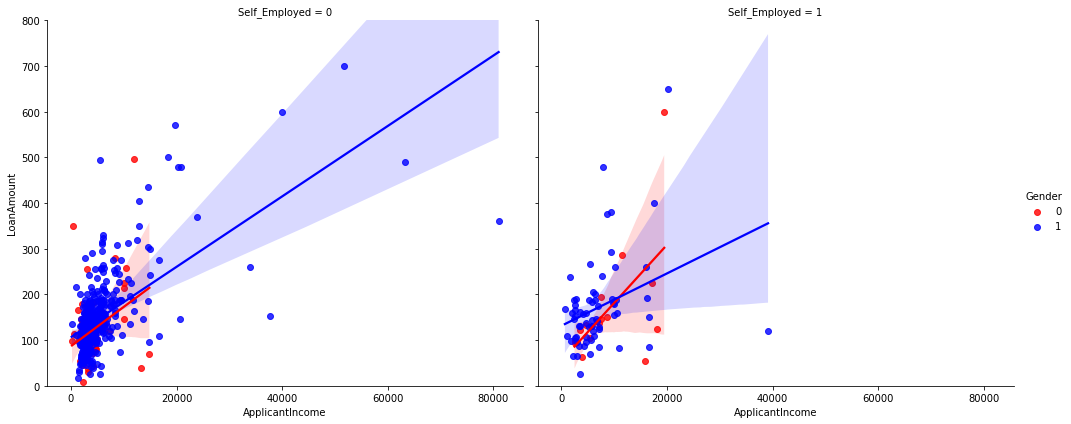

In [184]:
g = sns.lmplot(x='ApplicantIncome',y='LoanAmount',data= loan_train , col='Self_Employed', hue='Gender',
          palette= ["Red" , "Blue","Yellow"] ,aspect=1.2,size=6)
g.set(ylim=(0, 800))
##Relation Between the Male or female Applicant's income , Loan taken and Self employment.

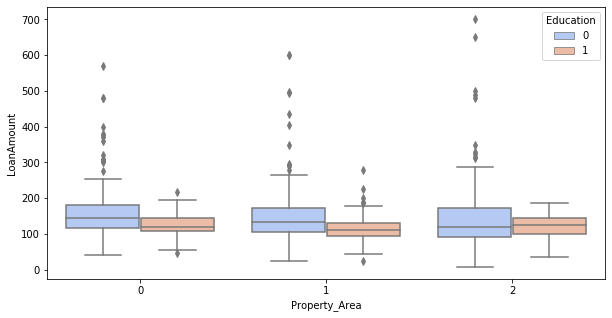

In [185]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Property_Area", y="LoanAmount", hue="Education",data=loan_train, palette="coolwarm")

In [186]:
loan_train.Credit_History.value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

# Modelling 

In [187]:
X = loan_train.drop('Loan_Status' , axis = 1 )
y = loan_train['Loan_Status']

X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state =102)

In [202]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train , y_train)
pred_l = logmodel.predict(X_test)
acc_l = accuracy_score(y_test , pred_l)*100
acc_l

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


83.24324324324324

In [189]:
#Random Forest 
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, y_train)
pred_rf = random_forest.predict(X_test)
acc_rf = accuracy_score(y_test , pred_rf)*100
acc_rf

81.62162162162161

In [190]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test , pred_knn)*100
acc_knn

61.08108108108108

In [191]:
#Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
pred_gb = gaussian.predict(X_test)
acc_gb = accuracy_score(y_test , pred_gb)*100
acc_gb

82.16216216216216

In [192]:
#SVM
svc = SVC()
svc.fit(X_train, y_train)
pred_svm = svc.predict(X_test)
acc_svm = accuracy_score(y_test , pred_svm)*100
acc_svm

70.27027027027027

In [193]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
pred_dec = clf.predict(X_test)
acc_dec = accuracy_score(y_test , pred_dec)*100
acc_dec

70.8108108108108

In [194]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model = abc.fit(X_train, y_train)
pred_abc = model.predict(X_test)
acc_abc = accuracy_score(y_test , pred_abc)*100
acc_abc

80.54054054054053

In [195]:
#Gradient Boosting Classifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
pred_gbc = gbk.predict(X_test)
acc_gbc = accuracy_score(y_test , pred_gbc)*100
acc_gbc

81.08108108108108

In [196]:
# Bagging Descison tree
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(X_train, y_train)
pred_bdt = bg.predict(X_test)
acc_bdt = accuracy_score(y_test , pred_bdt)*100
acc_bdt

75.13513513513513

In [197]:
## Arranging the Accuracy results
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forrest','K- Nearest Neighbour' ,
             'Naive Bayes' , 'SVM','Gradient Boosting Classifier','Decision Tree','Bagging Descison tree','Adaboost'],
    'Score': [acc_l , acc_rf , acc_knn , acc_gb ,acc_svm ,acc_gbc,acc_dec,acc_bdt,acc_abc ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,83.243243
3,Naive Bayes,82.162162
1,Random Forrest,81.621622
5,Gradient Boosting Classifier,81.081081
8,Adaboost,80.540541
7,Bagging Descison tree,75.135135
6,Decision Tree,70.810811
4,SVM,70.270270
2,K- Nearest Neighbour,61.081081


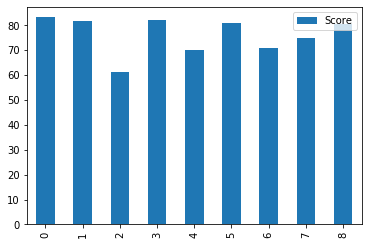

In [198]:
models.plot.bar()

In [199]:
importances = pd.DataFrame({'Features':X_train.columns,'Importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
importances.head(11) 

,Importance
Features,
Credit_History,0.245
ApplicantIncome,0.220
LoanAmount,0.209
CoapplicantIncome,0.124
Dependents,0.057
Property_Area,0.055
Education,0.027
Married,0.024
Gender,0.022


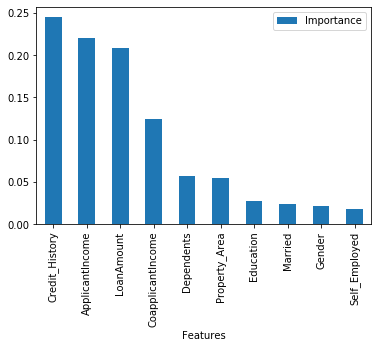

In [200]:
importances.plot.bar()